In [9]:
import pandas as pd
df = pd.read_csv('../Data/output.csv', header = None)
df

,0,1,2,3,4,5
0,Node: 0,Time: +4s,10.1.1.25,10.1.1.25,1,1
1,Node: 0,Time: +4s,10.1.1.26,10.1.1.26,1,1
2,Node: 0,Time: +4s,10.1.1.29,10.1.1.29,1,1
3,Node: 0,Time: +4s,10.1.1.31,10.1.1.31,1,1
4,Node: 0,Time: +4s,10.1.1.33,10.1.1.33,1,1
...,...,...,...,...,...,...
24310,Node: 47,Time: +98s,10.1.1.14,10.1.1.14,1,1
24311,Node: 47,Time: +98s,10.1.1.17,10.1.1.17,1,1
24312,Node: 47,Time: +98s,10.1.1.34,10.1.1.34,1,1
24313,Node: 48,Time: +98s,10.1.1.46,10.1.1.46,1,1


In [12]:
dic = {}
for index in range(df.shape[0]):
    t = eval(df[1][index][8: -1])
    startNode = eval(df[0][index][6:]) + 1
    nextNode = eval(df[3][index][8:])
    nowDistance = df[5][index]
    dic.setdefault(t, {}).setdefault(startNode, []).append(nextNode)
dic[4]

{1: [25, 26, 29, 31, 33, 49],
 2: [3, 10, 12, 24, 32, 37, 44],
 3: [2, 10, 12, 24, 30, 32, 37, 44],
 4: [14, 23],
 5: [7, 13, 18, 21],
 6: [7, 9, 13, 21, 46],
 7: [5, 6, 9, 13, 18, 21],
 8: [20, 28, 35, 41],
 9: [6, 7, 13],
 10: [2, 3, 24, 32, 37],
 11: [19],
 12: [2, 3, 17, 30, 32, 34, 37, 39, 44],
 13: [5, 6, 7, 9, 21],
 14: [4, 23, 34],
 15: [25, 40],
 16: [22, 30, 38, 42, 43],
 17: [12, 26, 37, 39, 44, 47],
 18: [5, 7, 21, 50],
 19: [11],
 20: [8, 24],
 21: [5, 6, 7, 13, 18],
 22: [16, 30, 38, 42],
 23: [4, 14, 34],
 24: [2, 3, 10, 20],
 25: [1, 15, 29, 33, 49],
 26: [1, 17, 29, 31, 33, 47, 49],
 27: [48],
 28: [8, 35, 41],
 29: [1, 25, 26, 31, 33, 49],
 30: [3, 12, 16, 22, 32, 38],
 31: [1, 26, 29, 47, 49],
 32: [2, 3, 10, 12, 30, 37, 38, 44],
 33: [1, 25, 26, 29, 34, 49],
 34: [12, 14, 23, 33],
 35: [8, 28, 41],
 37: [2, 3, 10, 12, 17, 32, 39, 44],
 38: [16, 22, 30, 32, 42],
 39: [12, 17, 37, 44, 47],
 40: [15],
 41: [8, 28, 35],
 42: [16, 22, 38, 43, 45],
 43: [16, 22, 42, 45],


In [6]:
import networkx as nx
import networkx.algorithms.components as com
G = nx.MultiDiGraph()
G.add_nodes_from(range(1, 51))
n = G.number_of_nodes()
C = []
for t in dic:
    for startV in dic[t]:
        for endV in dic[t][startV]:
            keys = G.add_edge(startV, endV)
    w = com.number_weakly_connected_components(G)
    #print(w)
    sum = 0
    for index in com.weakly_connected_components(G):
        subG = G.subgraph(index)
        subN = subG.number_of_nodes()
        #print('subG\'s number:', subG.number_of_nodes())
        averShortestLenOfSubG = nx.average_shortest_path_length(subG)
        #print(averShortestLenOfSubG)
        sum += averShortestLenOfSubG * subN
    C.append(n / (w * sum))
print(C)

[0.06311423676855107, 0.0813953488372093, 0.11097957975732466, 0.11429877700308606, 0.11946479770627588, 0.12500520855035627, 0.13477694415741948, 0.137557888944931, 0.19985694450288216, 0.20677346334668292, 0.2110923473469025, 0.2227745990057218, 0.28561436232221965, 0.2891196601368893, 0.28959810874704495, 0.3356164383561644, 0.3548153511947864, 0.3772713273791192, 0.38049386550706626, 0.38637438889765013, 0.38839568801521873, 0.3893833439287984, 0.4022328024954852, 0.4110738255033557, 0.4175187457396046, 0.43309174474102885, 0.43309174474102885, 0.4350914580003552, 0.44945881489634937, 0.4532001479837218, 0.4595760645282311, 0.46348846008323874, 0.4654255319148936, 0.46997889890657973, 0.4709727028066128, 0.4745303118342049, 0.4792644757433489, 0.48152515723270434, 0.4843811783313563, 0.48756218905472637, 0.48882681564245806, 0.4917703733440385, 0.4917703733440385, 0.4929577464788733, 0.4943502824858757, 0.49595141700404854, 0.5051546391752577, 0.5053630363036303]


## 连通系数

$$
C = \cfrac{1}{\omega \sum_{i = 1}^{\omega} \cfrac{N_i}{N} l_i}
$$

 $C$ 为网络的连通系数，其中 $ω$ 为网络**连通分支数**， $N_i$为第 $i$ 个**连通分支中节点数目**， $N$ 为网络中**节点总数目**， $l_i$ 为第 $i$ 个**连通分支的平均最短路径**，**即该连通分支中任意两个节点之间最短连接距离的平均值**

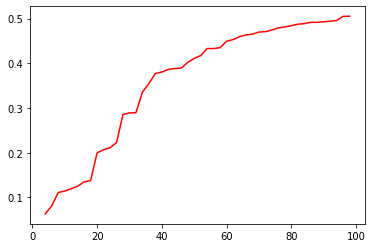

In [13]:
import matplotlib.pyplot as plt
x_time = []
for i in range(4, 100, 2):
    x_time.append(i)
plt.plot(x_time, C, color = 'red', label = 'connectivityCoefficient')

plt.show()

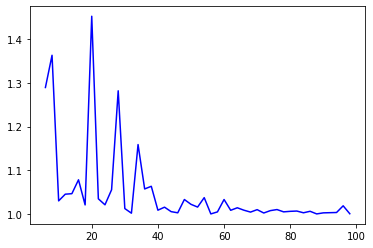

In [14]:
x_time = []
for i in range(6, 100, 2):
    x_time.append(i)
cmp = []
for i in range(0, 47):
    cmp.append(C[i + 1]/C[i])
plt.plot(x_time,cmp,color = 'blue', label = 'compare')

plt.show()